In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
from d2l import torch as d2l

In [2]:
num_inputs = 2
num_examples = 1000
true_w = torch.tensor([2, -3.4])
true_b = torch.tensor([4.2])
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
lables = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
lables += torch.tensor(np.random.normal(0, 0.01, size=lables.size()), dtype=torch.float32)

In [3]:
features[0], lables[0]

(tensor([0.2124, 0.2748]), tensor(3.6934))

/var/folders/cd/541yfjr903g2210q8g0l4vtm0000gn/T/ipykernel_23817/4103369922.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


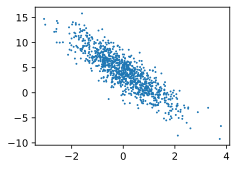

In [4]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), lables.numpy(), 1)

In [5]:
# %pip list 

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        # 在行上进行选择
        yield features.index_select(0, j), labels.index_select(0, j)

In [7]:
batch_size = 10
for x, y in data_iter(batch_size, features, lables):
    print(x, y)
    break

tensor([[ 0.6671,  0.3916],
        [-0.2946, -1.0691],
        [ 0.6513, -0.5562],
        [-0.5684,  0.2740],
        [ 2.1114,  1.2502],
        [ 1.3351, -1.9812],
        [ 1.3203,  0.2466],
        [-0.8524,  1.1931],
        [ 0.2048, -1.0927],
        [ 0.0428,  2.0705]]) tensor([ 4.2210,  7.2437,  7.3988,  2.1341,  4.1380, 13.6129,  6.0065, -1.5479,
         8.3243, -2.7540])


In [8]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [9]:
# w = torch.normal(0, 0.01, size=(num_inputs, 1), requires_grad=True)
# b = torch.zeros(1, requires_grad=True)

In [10]:
# linear regression model
def linreg(X, w, b):
    return torch.matmul(X, w) + b

In [11]:
# loss func
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [12]:
# SGD = Stochastic Gradient Descent（随机梯度下降） 
# learning rate（学习率）
def sgd(params, lr, batch_size):
    with torch.no_grad(): # 不记录 autograd 的操作
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_() # 清除旧梯度

In [13]:
# ----------------------------------------------traning begin

In [14]:
# hyperparameter
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, lables):
        # 向前传播: 计算预测值和损失
        l = loss(net(X, w, b), y)
        # 反向传播: 计算梯度（∂L/∂w, ∂L/∂b）
        l.sum().backward()
        # 参数更新: 按梯度方向更新参数
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), lables)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):6f}')
        

epoch 1, loss 0.047387
epoch 2, loss 0.000194
epoch 3, loss 0.000050


In [15]:
print(true_w, '\n', w)
print(true_b, '\n', b)

tensor([ 2.0000, -3.4000]) 
 tensor([[ 2.0002],
        [-3.3991]], requires_grad=True)
tensor([4.2000]) 
 tensor([4.1993], requires_grad=True)


In [16]:
print(f'w------------------>: {true_w - w.reshape((1, 2))}')
print(f'b------------------>: {true_b - b}')

w------------------>: tensor([[-0.0002, -0.0009]], grad_fn=<SubBackward0>)
b------------------>: tensor([0.0007], grad_fn=<SubBackward0>)
